In [3]:
import tensorflow as tf
from tensorflow import keras


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/sirapat-thianphan/SeminarII_Sirapat/master/events_bs2_2.csv'
loaded_data = pd.read_csv(url, sep=',', header=0)

In [6]:
loaded_data.head(10)

,tactic0_id,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,1,101.19182,6.13009,3467.485002,85.604275,0,0,927.963005,5,1308.145156,2,284.929088,3,27.677967
1,0,101.26577,6.41964,972.895329,1515.131446,0,0,1855.001821,4,2805.680397,2,1321.192664,1,1077.837387
2,1,101.14605,6.68195,4535.321847,372.279866,1,3,294.153727,7,212.795421,2,323.187802,10,97.315259
3,1,101.22266,6.85446,240.146910,333.135614,0,0,1591.508482,3,407.629181,1,155.356802,3,6.634046
4,0,101.34695,6.45786,242.448908,1172.773291,0,0,558.423389,5,701.641769,2,620.660475,5,31.915022
5,0,100.97757,6.65426,4096.016638,1315.821482,0,0,1716.603590,5,6956.354136,1,14218.082300,5,1124.033888
6,0,101.74995,6.27591,2686.242719,932.762119,1,3,1707.460629,4,3448.168296,2,69.781556,6,71.977883
7,0,101.62470,6.71488,580.185597,403.194092,0,0,567.060214,4,1545.663021,2,80.889155,4,35.425075
8,1,101.28660,6.72085,302.995168,143.336508,1,3,1104.123671,4,363.863675,2,1144.968962,3,25.827262
9,0,101.45094,6.49835,2562.292453,250.031476,0,0,3504.811321,4,7015.471466,2,2175.258547,6,14.428984


In [7]:
X = loaded_data.iloc[:,1:]
y = loaded_data.iloc[:,0]

In [8]:
X.head(5)

,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,101.19182,6.13009,3467.485002,85.604275,0,0,927.963005,5,1308.145156,2,284.929088,3,27.677967
1,101.26577,6.41964,972.895329,1515.131446,0,0,1855.001821,4,2805.680397,2,1321.192664,1,1077.837387
2,101.14605,6.68195,4535.321847,372.279866,1,3,294.153727,7,212.795421,2,323.187802,10,97.315259
3,101.22266,6.85446,240.146910,333.135614,0,0,1591.508482,3,407.629181,1,155.356802,3,6.634046
4,101.34695,6.45786,242.448908,1172.773291,0,0,558.423389,5,701.641769,2,620.660475,5,31.915022


In [9]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

/Users/kratung/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kratung/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.shape

(6400, 13)

In [11]:
from keras import models
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [12]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))
    model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'])
    return model

In [13]:
# K-Fold Validation

k=4
num_val_samples = len(X_train) // k 
num_epochs = 200
all_loss_histories = []
all_acc_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate( [X_train[:i * num_val_samples], X_train[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs = num_epochs, batch_size=16, verbose=0)
    loss_history = history.history['val_loss']
    acc_history = history.history['val_acc']
    all_loss_histories.append(loss_history)
    all_acc_histories.append(acc_history)
    
    # val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=0)
    # all_acc_histories.append(acc_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
# Average of the per-epoch acc for all folds
average_loss_history = [ np.mean( [x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_acc_history = [ np.mean( [x[i] for x in all_acc_histories]) for i in range(num_epochs)]


In [18]:
len(average_loss_history)

200

In [20]:
# Average of loss
np.mean(average_loss_history)

0.6843212828043849

In [21]:
# Average of acc
np.mean(average_acc_history)

0.62655390625

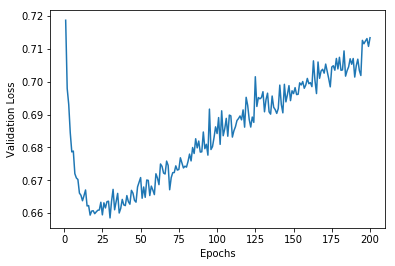

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_loss_history) +1), average_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

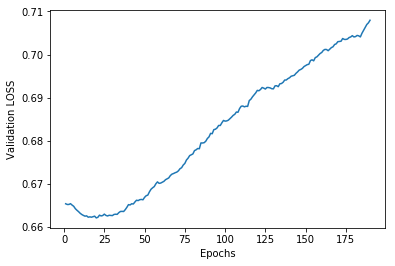

In [23]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_loss_history = smooth_curve(average_loss_history[10:])

plt.plot(range(1, len(smooth_loss_history)+1), smooth_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation LOSS')
plt.show()

In [27]:
model = build_model()
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=0)
test_loss_score, test_acc_score = model.evaluate(X_test, y_test)

1600/1600 [==============================] - 0s 184us/step


In [28]:
print(test_acc_score)

0.66


In [29]:
print(test_loss_score)

0.6429630744457245
